# Part 1: Basic Mathematical Description of Networks


**Activities:**

- **Reading**
  - Chapter 2
- **Exercises**
  - Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?


# Part 2: Exercises using the NetworkX library


## Exercise 2.1 (Königsbeg Problem)

Figures a, c, and d can be drawn without lifting pencil from finger. From Euler, a node with an uneven number of links has to be either a starting point or an end point. Figure b has four nodes with unven amount of links. Thus all cannot be visited without retraversing some edges.


## Exercise 2.3 (Graph Representation)


**Undirected and directed graphs:**


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

undirected_graph = nx.Graph()
directed_graph = nx.DiGraph()

# Nodes
undirected_graph.add_nodes_from([1, 2, 3, 4, 5, 6])
directed_graph.add_nodes_from([1, 2, 3, 4, 5, 6])

# Edges
undirected_graph.add_edges_from(
    [(1, 6), (1, 4), (1, 3), (1, 2), (2, 3), (2, 4), (3, 6), (4, 2)]
)

directed_graph.add_edges_from(
    [(1, 2), (2, 4), (2, 3), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]
)

# Plots graphs
# subax1 = plt.subplot(1, 2, 1)
# nx.draw(undirected_graph, with_labels=True)
# subax2 = plt.subplot(1, 2, 2)
# nx.draw(directed_graph, with_labels=True)
# plt.show()

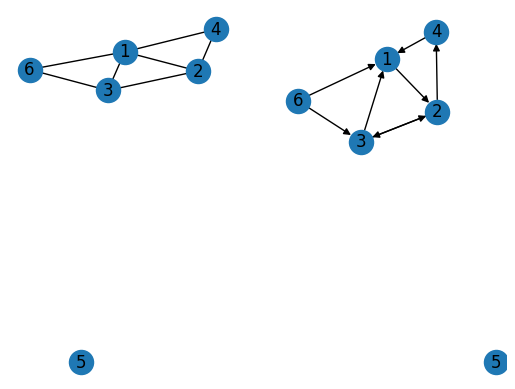

In [12]:
from IPython.display import Image, display

display(Image("networks.png"))

**Adjacency matrices:**

Undirected graph:
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 & 1 \\
1 & 0 & 1 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 & 1 \\
1 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 \\
\end{bmatrix}

Directed graph:
\begin{bmatrix}
0 & 0 & 1 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 1 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}


**Adjacency/linked lists:**


Undirected graph adjacency list:

\begin{aligned}
1 &\to \{2, 3, 4, 6\} \\
2 &\to \{1, 3, 4\} \\
3 &\to \{1, 2, 6\} \\
4 &\to \{1, 2\} \\
5 &\to \{\} \\
6 &\to \{1, 3\} \\
\end{aligned}

Directed graph adjacency list:

\begin{aligned}
1 &\to \{3, 4, 6\} \\
2 &\to \{1, 3\} \\
3 &\to \{2, 6\} \\
4 &\to \{2\} \\
5 &\to \{\} \\
6 &\to \{\} \\
\end{aligned}


## Exercise 2.5 (Bipartite Networks)


We consider the network:


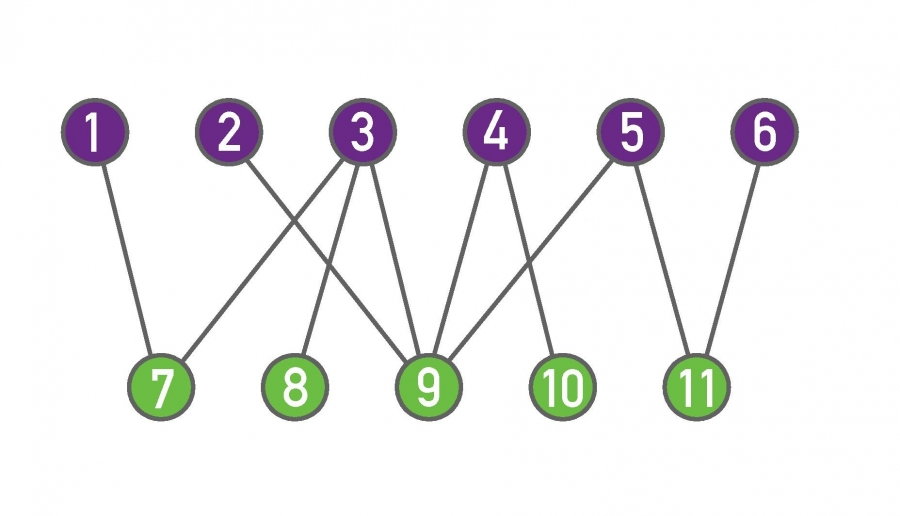

In [13]:
display(Image("bipartite-network.jpg"))

**Max numbe of links $L_{max}$:**

$$
L_{max}=N_1+N_2=6\cdot 5 = 30
$$


# Part 3: Plotting Degree Distributions


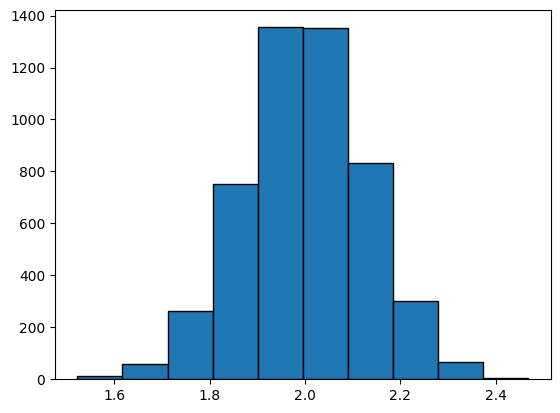

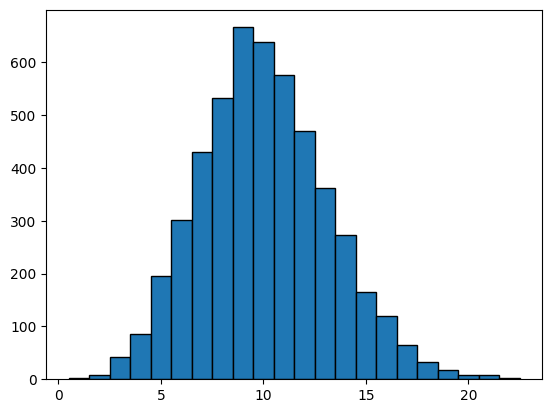

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import networkx as nx

# Numbers
N = 5000

# Gaussian distribution with mean and standard deviation
points_gauss = []
mean = 2
std = 0.125

# Generating random numbers from Gaussian distribution
for i in range(N):
    gauss_dis = rd.gauss(mean, std)
    points_gauss.append(gauss_dis)

# Binned data
binned_data = np.histogram(points_gauss, 10)

# Plotting binned data
plt.hist(points_gauss, bins=10, edgecolor="black")
plt.show()

# Poisson distribution with lambda
points_poisson = []
lam = 10

# Drawing random numbers from Poisson distribution
for i in range(N):
    poisson_dis = np.random.poisson(lam)
    points_poisson.append(poisson_dis)

# Min. and max:
min_no = min(points_poisson)
max_no = max(points_poisson)

# Binning vector
v = np.arange(min_no, max_no + 2)

binned_poisson = np.histogram(points_poisson, v)

plt.bar(v[:-1], binned_poisson[0], width=1, edgecolor="black")
plt.show()

# Calculate p to achieve average degree k=degree_avg
degree_avg = lam
p = (N - 1) / degree_avg

# Erdos-Renyi (ER) network
ER_graph = nx.erdos_renyi_graph(N, p)

# Part 4: Random Networks